Sentiment Analysis for Amazon Fine Foods Reviews with a Streamlit Application for feedback


I will be using different NLP techniques to do Sentiment analysis on Amazon Fine Foods Reviews in this notebook



* VADER (Valence Aware Dictionary and Sentiment Reasoner) - Bag of words approach
* RoBERTa(Robustly Optimized BERT Approach) pre-trained model
* Huggingface Pipeline


In [69]:
pip install svgling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 2.1 MB/s eta 0:00:00


Import Libraries

In [70]:
#Importing various libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk.corpus
plt.style.use('ggplot')
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nltk.download('maxent_ne_chunker')
nltk.download('words')
import torch
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from svgling import draw_tree


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


This dataset is an Amazon Fine Food Reviews dataset which was originally published on Kaggle by a user named Laowingkin. It consists of reviews of fine foods from Amazon between October 1999 and October 2012. This dataset is commonly used for sentiment analysis, natural language processing tasks and building recommendation systems. It provides a rich resource for exploring sentiment trends over a period of time and understanding customer behaviour in online product reviews.
https://www.kaggle.com/code/laowingkin/amazon-fine-food-review-sentiment-analysis/input



Read Data

In [2]:
#Loading dataset
data = 'Reviews.csv'
df = pd.read_csv(data)
columns = ['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score',
           'Time', 'Summary', 'Text']
print(df.shape)
df = df.head(350)
print(df.shape)


(568454, 10)
(350, 10)


In [3]:
processed_data = []
for value in df:
    try:
        # Try converting to float
        processed_data.append(float(value))
    except ValueError:
        # Handle non-numeric values (e.g., replace with NaN)
        processed_data.append(float('nan'))  # or any other handling method

print(processed_data)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      350 non-null    int64 
 1   ProductId               350 non-null    object
 2   UserId                  350 non-null    object
 3   ProfileName             350 non-null    object
 4   HelpfulnessNumerator    350 non-null    int64 
 5   HelpfulnessDenominator  350 non-null    int64 
 6   Score                   350 non-null    int64 
 7   Time                    350 non-null    int64 
 8   Summary                 350 non-null    object
 9   Text                    350 non-null    object
dtypes: int64(5), object(5)
memory usage: 27.5+ KB


In [8]:
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [9]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,350.000000,350.000000,350.000000,350.000000,3.500000e+02
mean,175.500000,1.168571,1.542857,4.251429,1.301538e+09
std,101.180532,2.289289,2.714103,1.266580,4.854933e+07
min,1.000000,0.000000,0.000000,1.000000,1.107821e+09
25%,88.250000,0.000000,0.000000,4.000000,1.281074e+09
50%,175.500000,0.000000,1.000000,5.000000,1.318378e+09
75%,262.750000,1.000000,2.000000,5.000000,1.336090e+09
max,350.000000,19.000000,19.000000,5.000000,1.351210e+09


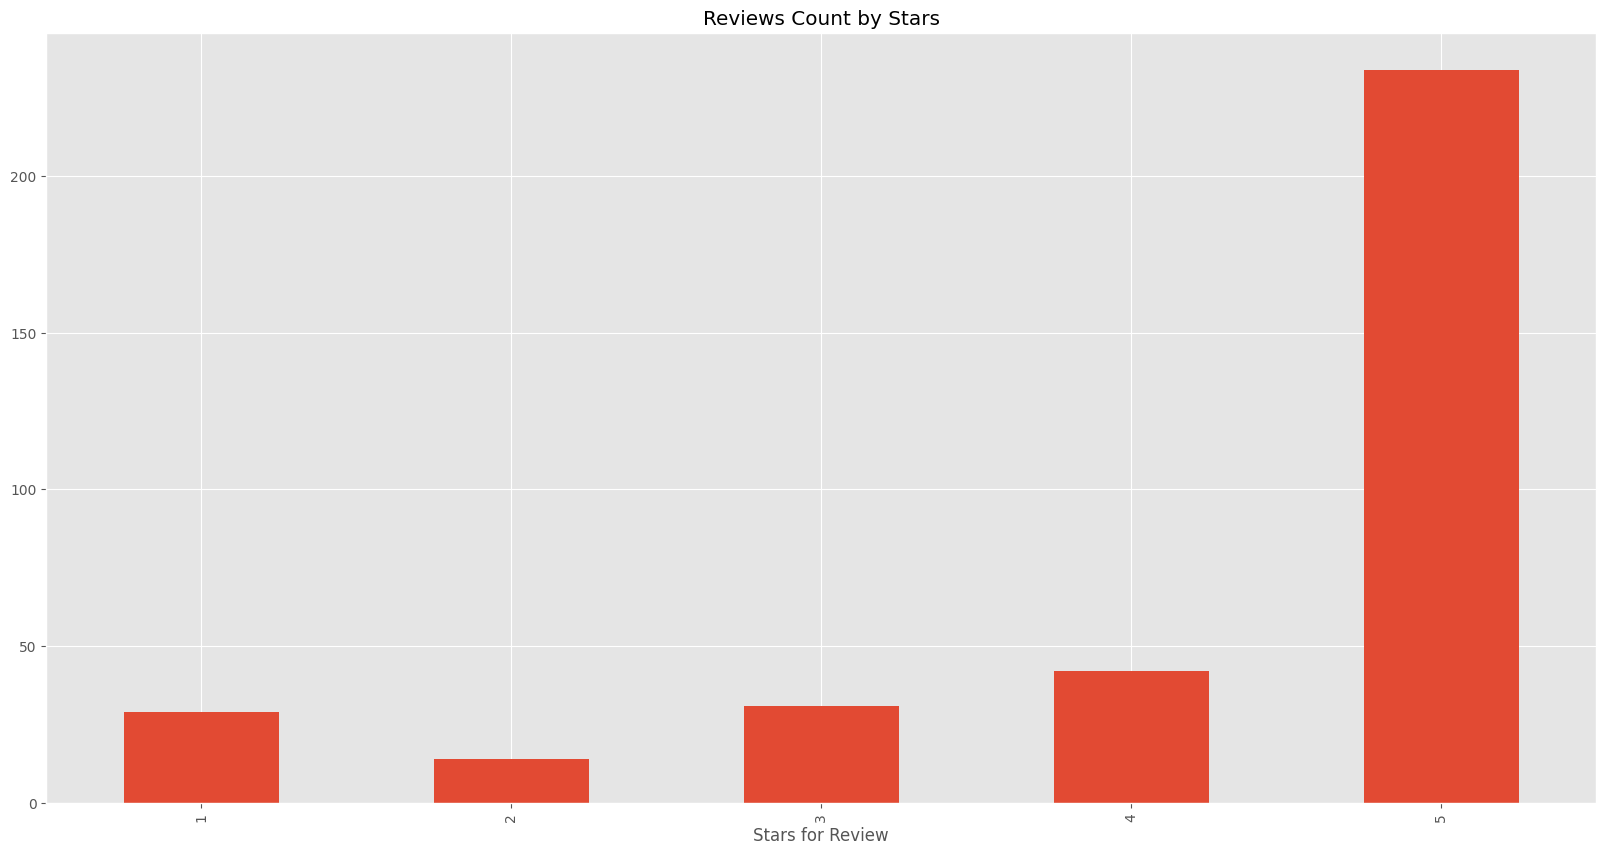

In [10]:
# Count occurrences of each score and sort by index
ax = df['Score'].value_counts().sort_index().plot(kind='bar', figsize=(20, 10))

# Set title and labels
ax.set_title('Reviews Count by Stars')
ax.set_xlabel('Stars for Review')

# Show the plot
plt.show()


In [11]:
#Split-out dataset into training and test sets

X = df[['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score',
           'Time', 'Summary', 'Text']]
y = df[['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score',
           'Time', 'Summary', 'Text']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [12]:
print(X_train.shape)
X_train

(245, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
41,42,B001EO5QW8,A1WK4ALVZDYPUE,"Dick Baldwin ""christobe""",0,0,5,1302134400,Oatmeal For Oatmeal Lovers,McCann's makes oatmeal for every oatmeal conno...
38,39,B001EO5QW8,A2GHZ2UTV2B0CD,JERRY REITH,0,0,4,1350777600,GOOD WAY TO START THE DAY....,I WAS VISITING MY FRIEND NATE THE OTHER MORNIN...
212,213,B0009XLVGA,A2LWOW7SO2QPML,JHexatthewheel,0,1,2,1310515200,Nearly killed the cats,Too much of a good thing? We worked this kibbl...
290,291,B001UJEN6C,A1R2P21ZYNJCFJ,"Mare Laden ""Mare""",6,7,3,1258675200,Not sure,I am a energy junkie and I'm not sure if this ...
250,251,B007J32WX4,A3957BBBNL1TLJ,Susan Hannon,2,2,5,1334361600,Super! SuperFoods are Super easy!,WOW! This product is very impressive. I bough...
...,...,...,...,...,...,...,...,...,...,...
203,204,B0028C44Z0,A2Q8F5N7HQXWDW,Bell Girl,0,0,4,1316908800,A huge hit at the office!,I keep a case of these in my office and always...
255,256,B0048IC328,A375ZA7IJH2ZGQ,Jihan S.,3,7,2,1317772800,"If you can't handle caffeine, this is not for ...","Yes, it's probably healthier than 5-Hour Energ..."
72,73,B006SQBRMA,ATYMT48R62ENE,Marie,0,0,5,1327017600,Best ever latice tart,I ordered two of these and two of raspberry la...
235,236,B001HTL6CY,A1KLA02LZXAT46,Dandelion,0,0,2,1302307200,"Taste is neutral, quantity is DECEITFUL!",The taste of these white cheddar flat breads i...


In [13]:
print(y_train.shape)
y_train

(245, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
41,42,B001EO5QW8,A1WK4ALVZDYPUE,"Dick Baldwin ""christobe""",0,0,5,1302134400,Oatmeal For Oatmeal Lovers,McCann's makes oatmeal for every oatmeal conno...
38,39,B001EO5QW8,A2GHZ2UTV2B0CD,JERRY REITH,0,0,4,1350777600,GOOD WAY TO START THE DAY....,I WAS VISITING MY FRIEND NATE THE OTHER MORNIN...
212,213,B0009XLVGA,A2LWOW7SO2QPML,JHexatthewheel,0,1,2,1310515200,Nearly killed the cats,Too much of a good thing? We worked this kibbl...
290,291,B001UJEN6C,A1R2P21ZYNJCFJ,"Mare Laden ""Mare""",6,7,3,1258675200,Not sure,I am a energy junkie and I'm not sure if this ...
250,251,B007J32WX4,A3957BBBNL1TLJ,Susan Hannon,2,2,5,1334361600,Super! SuperFoods are Super easy!,WOW! This product is very impressive. I bough...
...,...,...,...,...,...,...,...,...,...,...
203,204,B0028C44Z0,A2Q8F5N7HQXWDW,Bell Girl,0,0,4,1316908800,A huge hit at the office!,I keep a case of these in my office and always...
255,256,B0048IC328,A375ZA7IJH2ZGQ,Jihan S.,3,7,2,1317772800,"If you can't handle caffeine, this is not for ...","Yes, it's probably healthier than 5-Hour Energ..."
72,73,B006SQBRMA,ATYMT48R62ENE,Marie,0,0,5,1327017600,Best ever latice tart,I ordered two of these and two of raspberry la...
235,236,B001HTL6CY,A1KLA02LZXAT46,Dandelion,0,0,2,1302307200,"Taste is neutral, quantity is DECEITFUL!",The taste of these white cheddar flat breads i...


In [14]:
print(X_test.shape)
X_test

(105, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
192,193,B004V6AH34,AJZ2A9UOJK0RB,LK,0,0,5,1336089600,Tastes Great. Arrived in 2 days!,"Tastes great, and gives me energy without the ..."
256,257,B0025WIAN0,A2WT4IIHNFJGYT,Diana KD,0,0,5,1347321600,"Yum, Yummy, Yummier",These Nature Valley Nut Lovers Variety Pack wa...
169,170,B0064KO0BU,AAV3AEI6YSYA2,sue,0,0,3,1345766400,Banana Heads Not Banana Runts,"The item over all was fine, but the Banana Hea..."
67,68,B005DUM9UQ,A8OFFIAL6XTOH,Bill Shirer,0,1,2,1338422400,Taste is not so good.,"I purchased the Mango flavor, and to me it doe..."
201,202,B0028C44Z0,A3VAYCK681VZZO,Optimus,0,0,5,1320710400,Love these! And reusable containers,"I love, and use the empty containers for medic..."
...,...,...,...,...,...,...,...,...,...,...
161,162,B000ITVLE2,A1K37I9HWF3SAI,James R. Mckinney,1,1,3,1349222400,Not the greatest tasting..,I have always purchased Star-Kist tuna but tho...
199,200,B0028C44Z0,A1WTXY4MW3YDF2,Gordon,0,0,5,1344729600,These mints are awesome!,This is a huge supply of them. I'm still worki...
70,71,B001GVISJC,A27TKQHFW0FB5N,Chet,2,2,5,1254355200,Great Gummi!,These Albanese gummi bears and rings and so on...
228,229,B007JFV6RK,A2UC5JUVHIF80L,Abendago,1,1,5,1334016000,Mcclures bloody Mary mix,Took me one or two to get used to the pickle t...


In [15]:
print(y_test.shape)
y_test

(105, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
192,193,B004V6AH34,AJZ2A9UOJK0RB,LK,0,0,5,1336089600,Tastes Great. Arrived in 2 days!,"Tastes great, and gives me energy without the ..."
256,257,B0025WIAN0,A2WT4IIHNFJGYT,Diana KD,0,0,5,1347321600,"Yum, Yummy, Yummier",These Nature Valley Nut Lovers Variety Pack wa...
169,170,B0064KO0BU,AAV3AEI6YSYA2,sue,0,0,3,1345766400,Banana Heads Not Banana Runts,"The item over all was fine, but the Banana Hea..."
67,68,B005DUM9UQ,A8OFFIAL6XTOH,Bill Shirer,0,1,2,1338422400,Taste is not so good.,"I purchased the Mango flavor, and to me it doe..."
201,202,B0028C44Z0,A3VAYCK681VZZO,Optimus,0,0,5,1320710400,Love these! And reusable containers,"I love, and use the empty containers for medic..."
...,...,...,...,...,...,...,...,...,...,...
161,162,B000ITVLE2,A1K37I9HWF3SAI,James R. Mckinney,1,1,3,1349222400,Not the greatest tasting..,I have always purchased Star-Kist tuna but tho...
199,200,B0028C44Z0,A1WTXY4MW3YDF2,Gordon,0,0,5,1344729600,These mints are awesome!,This is a huge supply of them. I'm still worki...
70,71,B001GVISJC,A27TKQHFW0FB5N,Chet,2,2,5,1254355200,Great Gummi!,These Albanese gummi bears and rings and so on...
228,229,B007JFV6RK,A2UC5JUVHIF80L,Abendago,1,1,5,1334016000,Mcclures bloody Mary mix,Took me one or two to get used to the pickle t...


In [16]:
print(X_train.columns)

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')


In [17]:
# Print the shapes of the resulting sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (245, 10) (245, 10)
Testing set shape: (105, 10) (105, 10)


Basic NLTK

In [18]:
#Use a sentence from the dataset
example=df['Text'][45]
print('Example text:', example)

Example text: This seems a little more wholesome than some of the supermarket brands, but it is somewhat mushy and doesn't have quite as much flavor either.  It didn't pass muster with my kids, so I probably won't buy it again.


In [19]:
#Create tokens from your sentence example
tokens = nltk.word_tokenize(example)[:10]

In [20]:
#tagged part of speech (pos)
tagged = nltk.pos_tag(tokens)
tagged[:20]

[('This', 'DT'),
 ('seems', 'VBZ'),
 ('a', 'DT'),
 ('little', 'RB'),
 ('more', 'RBR'),
 ('wholesome', 'JJ'),
 ('than', 'IN'),
 ('some', 'DT'),
 ('of', 'IN'),
 ('the', 'DT')]

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


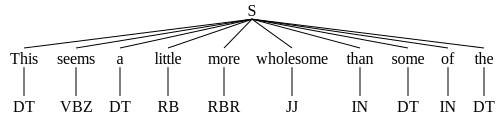

In [71]:
#display entities using chunking
nltk.download('maxent_ne_chunker')
nltk.download('words')
entities=nltk.chunk.ne_chunk(tagged)
entities

In [22]:
#Printing frequency distribution
from nltk.probability import FreqDist
fd=FreqDist(tokens)
fd

FreqDist({'This': 1, 'seems': 1, 'a': 1, 'little': 1, 'more': 1, 'wholesome': 1, 'than': 1, 'some': 1, 'of': 1, 'the': 1})

In [23]:
fd1=fd.most_common(10)
fd1

[('This', 1),
 ('seems', 1),
 ('a', 1),
 ('little', 1),
 ('more', 1),
 ('wholesome', 1),
 ('than', 1),
 ('some', 1),
 ('of', 1),
 ('the', 1)]

In [24]:
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [25]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  seems/VBZ
  a/DT
  little/RB
  more/RBR
  wholesome/JJ
  than/IN
  some/DT
  of/IN
  the/DT)


VADER Sentiment Scoring

VADER is lexicon and rule-based sentiment analysis tool that is specifically attentive to assumptions conveyed by web-based media.


In [26]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sa = SentimentIntensityAnalyzer()
sa

In [27]:
sa.polarity_scores(example)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [28]:
text = X_train.iloc[40]['Text']

# Get sentiment scores
scores = sa.polarity_scores(text)

print(text)


Products takes pretty good, and it doesn't leave you gittery.  With subscibe and save as well as Prime membership I pay below $ 2 a shot.  My wife tried them and now she drinks them like they are going out of style.  I moderate mine and they make for more effective use before weight training.  I recommend this product to anyone who is looking for a healthier alternative to high sugar and unnatural products that are everywhere that still gives you the results of an AWESOME Energy Drink.


In [29]:
# Print the scores
print("Sentiment scores:", scores)

Sentiment scores: {'neg': 0.014, 'neu': 0.705, 'pos': 0.281, 'compound': 0.9763}


In [30]:
#Run the polarity score on the test data set
res = {}
for i, row in tqdm(df.iterrows(), total=len(X_train)):
  text = row['Text']
  myid = row['Id']
  res[myid] = sa.polarity_scores(text)

res = {myid: sa.polarity_scores(text) for myid, text in tqdm(X_train[['Id', 'Text']].values)}


  0%|          | 0/245 [00:00<?, ?it/s]

  0%|          | 0/245 [00:00<?, ?it/s]

In [31]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(X_test, how='left')

vaders = (pd.DataFrame(res)
          .T
          .reset_index()
          .rename(columns={'index': 'Id'})
          .merge(X_train, how='left'))

In [32]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,42,0.030,0.848,0.122,0.9435,B001EO5QW8,A1WK4ALVZDYPUE,"Dick Baldwin ""christobe""",0,0,5,1302134400,Oatmeal For Oatmeal Lovers,McCann's makes oatmeal for every oatmeal conno...
1,39,0.050,0.846,0.104,0.7638,B001EO5QW8,A2GHZ2UTV2B0CD,JERRY REITH,0,0,4,1350777600,GOOD WAY TO START THE DAY....,I WAS VISITING MY FRIEND NATE THE OTHER MORNIN...
2,213,0.051,0.838,0.110,0.4404,B0009XLVGA,A2LWOW7SO2QPML,JHexatthewheel,0,1,2,1310515200,Nearly killed the cats,Too much of a good thing? We worked this kibbl...
3,291,0.104,0.705,0.191,0.6257,B001UJEN6C,A1R2P21ZYNJCFJ,"Mare Laden ""Mare""",6,7,3,1258675200,Not sure,I am a energy junkie and I'm not sure if this ...
4,251,0.047,0.781,0.172,0.9476,B007J32WX4,A3957BBBNL1TLJ,Susan Hannon,2,2,5,1334361600,Super! SuperFoods are Super easy!,WOW! This product is very impressive. I bough...


Plot VADER results

[]

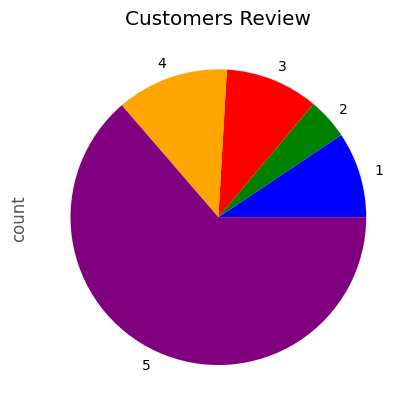

In [33]:
import matplotlib.pyplot as plt

# Assuming X_train is your DataFrame and 'Score' is the column you want to plot
colors = ['blue', 'green', 'red', 'orange', 'purple']  # Specify the colors you want to use

# Create the pie chart
plt = X_train['Score'].value_counts().sort_index().plot(kind='pie', title='Customers Review', colors=colors)

# Show the plot
plt.plot()


<ipython-input-34-f9d4f9805fdd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=vaders, x='Score', y='compound', palette=color_palette)


[]

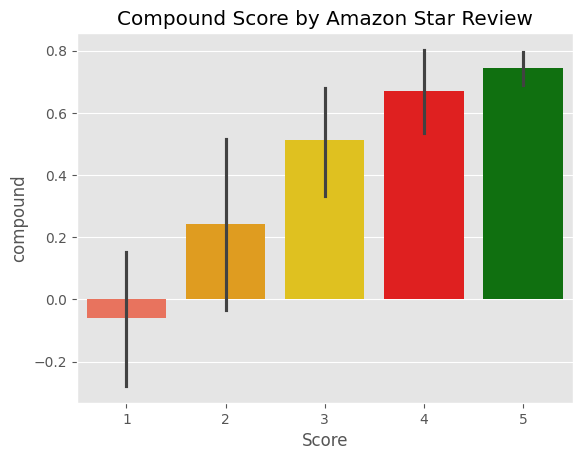

In [34]:
# Define a color palette
color_palette = ['#FF6347', '#FFA500', '#FFD700', '#FF0000', '#008000']

# Plot the compound score by Amazon star review
ax = sns.barplot(data=vaders, x='Score', y='compound', palette=color_palette)
ax.set_title('Compound Score by Amazon Star Review')
plt.plot()

# ax = sns.barplot(data=vaders, x='Score', y='compound')
# ax.set_title('Compound Score by Amazon Star Review')
# plt.show()

<ipython-input-35-882c214dcccb>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vaders, x='Score', y='pos', ax=axes[0], palette=color_palette)
<ipython-input-35-882c214dcccb>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vaders, x='Score', y='neu', ax=axes[1], palette=color_palette)
<ipython-input-35-882c214dcccb>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vaders, x='Score', y='neg', ax=axes[2], palette=color_palette)


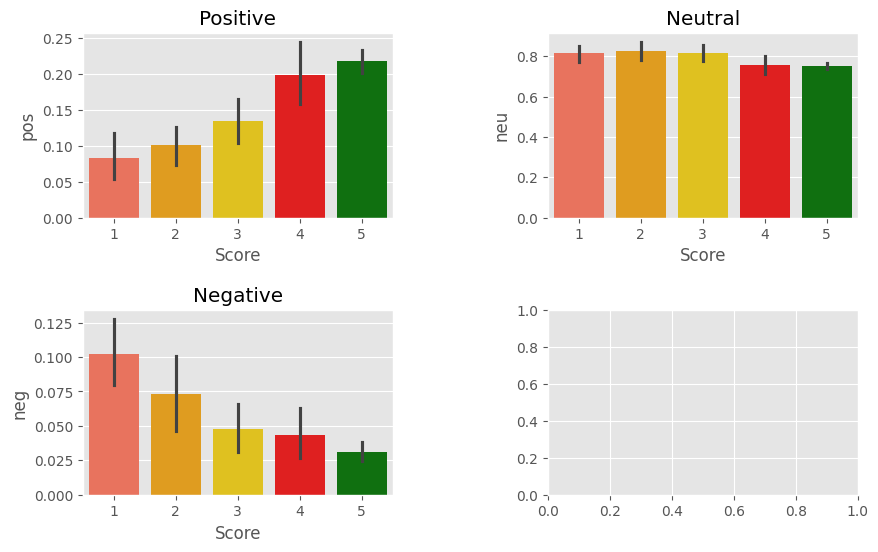

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the color palette
color_palette = ['#FF6347', '#FFA500', '#FFD700', '#FF0000', '#008000']

# Create a new figure with 2 rows and 2 columns of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

# Flatten the axes array to access individual axes
axes = axes.flatten()

# Plot the data on each subplot
sns.barplot(data=vaders, x='Score', y='pos', ax=axes[0], palette=color_palette)
sns.barplot(data=vaders, x='Score', y='neu', ax=axes[1], palette=color_palette)
sns.barplot(data=vaders, x='Score', y='neg', ax=axes[2], palette=color_palette)

# Add titles to subplots
axes[0].set_title('Positive')
axes[1].set_title('Neutral')
axes[2].set_title('Negative')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Display the figure
plt.show()

RoBERTa Pretrained Model

In [36]:
#Importing libraries for RoBERTa model
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [37]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [38]:
print(text)

The product was exactly as advertised and fresh.  Unfortunately, I keep them in a candy dish in the office and they are going fast.  We need to reorder to keep up with "demand"


In [39]:
#VADER results on text
sa.polarity_scores(text)

{'neg': 0.071, 'neu': 0.861, 'pos': 0.068, 'compound': -0.0258}

In [40]:
# Run Roberta Model
encoded_text = tokenizer(text, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.30989784, 'roberta_neu': 0.44326487, 'roberta_pos': 0.24683726}


In [41]:
def polarity_scores_roberta(text):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [42]:
#Iterate over the data set
res = {}
for i, row in tqdm(df.iterrows(), total=len(X_test)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sa.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/105 [00:00<?, ?it/s]

In [43]:
results_X_test = pd.DataFrame(res).T
results_X_test = results_X_test.reset_index().rename(columns={'index': 'Id'})
results_X_test = results_X_test.merge(y_test, how='left')

In [44]:
results_X_test.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.886888,0.099254,0.013858,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.886888,0.099254,0.013858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0.091,0.754,0.155,0.8265,0.886888,0.099254,0.013858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0.000,1.000,0.000,0.0000,0.886888,0.099254,0.013858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0.000,0.552,0.448,0.9468,0.886888,0.099254,0.013858,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy,Great taffy at a great price. There was a wid...


Compare Scores between models

In [45]:
print("VADER results:", sa.polarity_scores(text))
print("RoBERTa results:", scores_dict)

VADER results: {'neg': 0.071, 'neu': 0.861, 'pos': 0.068, 'compound': -0.0258}
RoBERTa results: {'roberta_neg': 0.30989784, 'roberta_neu': 0.44326487, 'roberta_pos': 0.24683726}


In [46]:
results_X_test.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

Combine and compare

[]

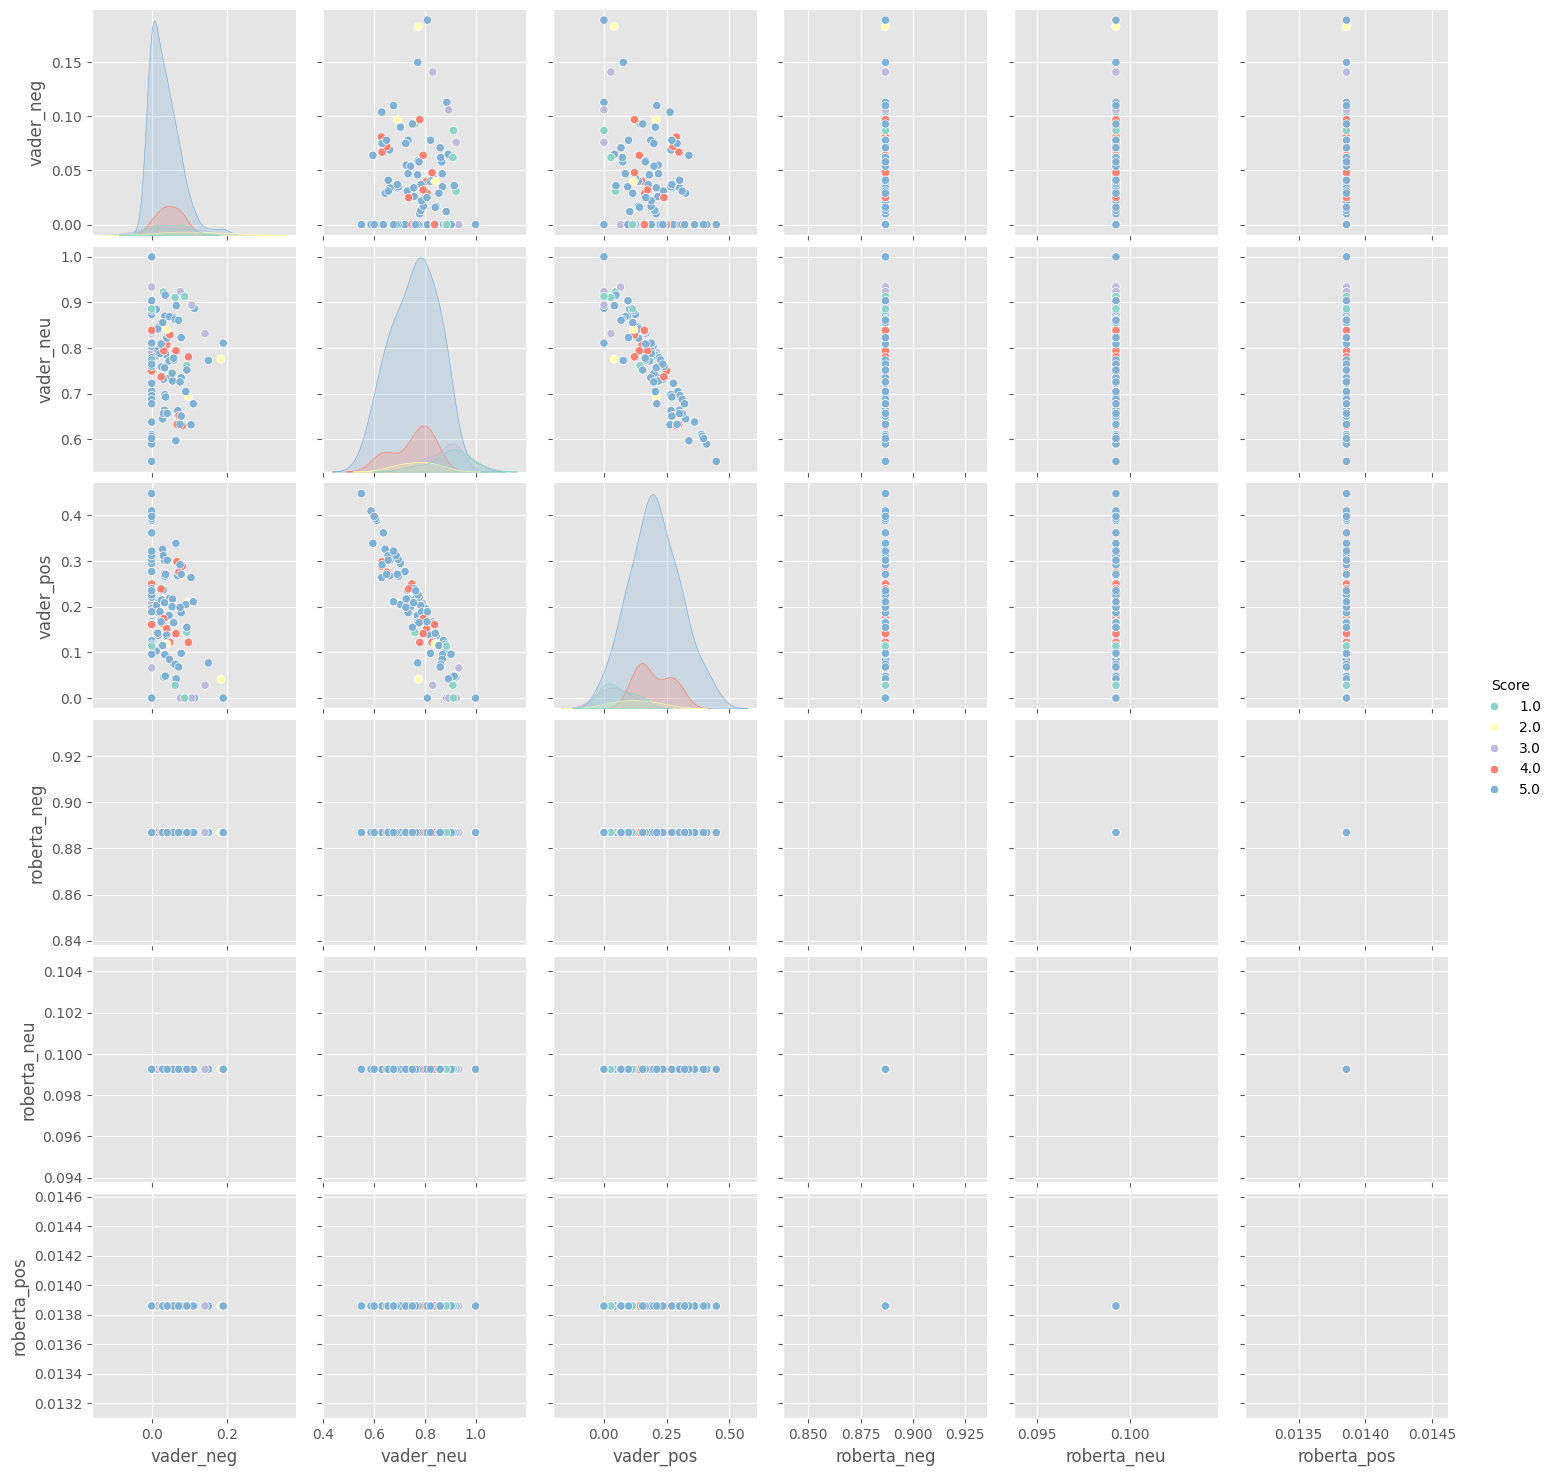

In [47]:
#Comparing VADER and RoBERTa results by plotting on graph
sns.pairplot(data=results_X_test,vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='Set3')
plt.plot()

Testing model on nuance in reviews

In [48]:
results_X_test.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

"My cats have been happily eating Felidae Platinum for more than two years. I just got a new bag and the shape of the food is different. They tried the new food when I first put it in their bowls and now the bowls sit full and the kitties will not touch the food. I've noticed similar reviews related to formula changes in the past. Unfortunately, I now need to find a new food that my cats will eat."

In [49]:
results_X_test.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'Buyer Beware Please! This sweetener is not for everybody.  Maltitol is an alcohol sugar and can be undigestible in the body.  You will know a short time after consuming it if you are one of the unsuspecting many who cannot digest it by the extreme intestinal bloating and cramping and massive amounts of gas a person can experience. Nausea, diarrhea & headaches can also be experienced. I learned my lesson the hard way years ago when I fell in love with the sugar-free chocolates suzanne sommers used to sell.  I thought I\'d found sugar-free chocolate nirvana at first taste but the bliss was short lived when the terrible side effects of maltitol kicked in.  The discomfort was unlike anything I had ever felt before.  I blew up like a balloon and had very painful abdominal cramping.  As the symptoms passed, this too was very unpleasant.  Though hard for me to believe a low calorie sweetener could be the culprit, all symptoms were gone when I stopped eating the chocolate. My hunch it had som

In [50]:
results_X_test.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[1]

'Took me one or two to get used to the pickle taste.  But now aim hooked and have to keep a bottle on hand'

In [51]:
results_X_test.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[1]

'I keep trying other brands.... cheaper brands. Stupid me! This ginger IS soooo worth the money. Tender, moist and never a let down.'

Hugging face Pipeline

In [52]:
#Using hugging face pipeline for easy sentiment analysis running on the RoBERTa pre-trained model
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis",model= MODEL)


In [53]:
sentence = X_train['Text'][21]
a = sent_pipeline(sentence)
print(a)

[{'label': 'LABEL_2', 'score': 0.9775775671005249}]


In [54]:
#Simple prediction preprocessing funtion to clean up
def preprocess(output):
  output = output[0]
  if output['label'] == "LABEL_2":
    output['label'] = "POSITIVE"
  elif output["label"] == "LABEL_1":
    output["label"] = "NEUTRAL"
  elif output["label"] == "LABEL_0":
    output["label"] = "NEGATIVE"
  else:
    pass
  return output

preprocess(a)

{'label': 'POSITIVE', 'score': 0.9775775671005249}

In [55]:
x=sent_pipeline(sentence)
preprocess(x)

{'label': 'POSITIVE', 'score': 0.9775775671005249}

In [56]:
example2 = X_train['Text'][76]
y=sent_pipeline(example2)
preprocess(y)

{'label': 'NEUTRAL', 'score': 0.43165016174316406}

In [57]:
example3 = X_train['Text'][35]
y=sent_pipeline(example2)
preprocess(y)

{'label': 'NEUTRAL', 'score': 0.43165016174316406}

STREAMLIT APPLICATION


In [58]:
!pip install streamlit
!wget -q -c -nc https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip -qq -n ngrok-stable-linux-amd64.zip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 85.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.9 MB/s eta 0:00:00


In [59]:
!pip install pyngrok

In [60]:
%%writefile app.py
import streamlit as st
from pyngrok import ngrok
import os
from threading import Thread
from textblob import TextBlob
import pickle
from transformers import pipeline
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax


MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)


#pipeline - this pipeline handles all the internal processing to go into the model and make a prediction
pred_pipeline = pipeline(task="sentiment-analysis", model=MODEL)

#Simple prediction preprocessing funtion to clean up
def preprocess(output):
  output = output[0]
  if output['label'] == "LABEL_2":
    output['label'] = "POSITIVE"
  elif output["label"] == "LABEL_1":
    output["label"] = "NEUTRAL"
  elif output["label"] == "LABEL_0":
    output["label"] = "NEGATIVE"
  else:
    pass
  return output



# create title
st.title('Sentiment Analysis on Amazon Fine Foods Reviews')

review = st.text_input('Enter your review:')

submit = st.button('Predict')

if submit:
    prediction = pred_pipeline(review)
    prediction = preprocess(prediction)

    if prediction['label'] == 'POSITIVE':
      st.success('POSITIVE')
    else:
      st.warning('NEGATIVE')




Writing app.py


In [61]:
!streamlit run app.py &>/dev/null&

In [62]:
get_ipython().system_raw('./ngrok http 8501 &')

In [63]:
from pyngrok import ngrok
ngrok.set_auth_token('2fvP0U5Lq51GGiwTfqdMV0KLOIc_3coHpamaM9b2AmD3u1RU1')

In [64]:
def run_streamlit():
     os.system('app.py --server.port 8501')

In [65]:
# Start a thread to run the Streamlit app
from threading import Thread
import os

thread = Thread(target=run_streamlit)
thread.start()

In [66]:
# Open a tunnel to the streamlit port 8501
public_url = ngrok.connect(addr='8501', proto='http', bind_tls=True)
print('Streamlit app is live at:', public_url)

Streamlit app is live at: NgrokTunnel: "https://ecfe-34-106-203-133.ngrok-free.app" -> "http://localhost:8501"


In [67]:
!curl -s http://localhost:4040/api/tunnels

{"tunnels":[{"name":"http-8501-2c3787c5-ca76-49d4-97a6-00f66c2ebfea","ID":"b9470668ea2357edf3d355cf526b2059","uri":"/api/tunnels/http-8501-2c3787c5-ca76-49d4-97a6-00f66c2ebfea","public_url":"https://ecfe-34-106-203-133.ngrok-free.app","proto":"https","config":{"addr":"http://localhost:8501","inspect":true},"metrics":{"conns":{"count":0,"gauge":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0},"http":{"count":0,"rate1":0,"rate5":0,"rate15":0,"p50":0,"p90":0,"p95":0,"p99":0}}}],"uri":"/api/tunnels"}
